<a href="https://colab.research.google.com/github/BStricks/NLP_practice/blob/master/Job_Interview(FCA)_ML_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Classification Task

The task is to predict the outcome of a bank's marketing campaign, there a number of continuous and categorical variables that can be used to predict the binary outcome.

references:

https://medium.com/@abbdar/first-steps-in-machine-learning-predicting-subscription-for-bank-deposits-866516b90e4
https://towardsdatascience.com/machine-learning-classification-with-python-for-direct-marketing-2da27906ddac
https://medium.com/@jameschen_78678/which-customers-are-more-likely-to-respond-to-banks-marketing-campaigns-3f00c512268d
https://medium.com/@arseniytyurin/bank-marketing-campaign-unbalanced-classification-problem-c61793a559cd

# Data Collection and cleaning



1.   Load in data
2.   Remove erroneous data
3.   Convert to appropriate data type
3.   Data set balancing - alternative under vs over sampling alternative data sets



In [0]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.utils import resample
import pandas_profiling

In [0]:
###mount drive
from google.colab import drive
drive.mount('/content/gdrive')

###change directory
%cd /content/gdrive/My\ Drive/Colab\ Notebooks

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks


In [0]:
#read in the data and view
df = pd.read_csv('Data_Science_excel.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [0]:
# a shortcut for all the below analysis :)
# pandas_profiling.ProfileReport(df)

In [0]:
#descriptive statistics
df.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
count,41183.000000,41183,41183,41183,41183,41183,41183,41183,41183,41183,41183.000000,41183.000000,41183.00000,41183.000000,41183,41183.000000,41183.000000,41183.000000,41183.000000,41183.000000,41183
unique,NaN,12,4,8,3,3,3,2,10,5,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10421,24925,12167,32583,21574,33945,26141,13768,8619,NaN,NaN,NaN,NaN,35558,NaN,NaN,NaN,NaN,NaN,36544
mean,40.024646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.299225,2.567783,962.47102,0.172984,NaN,0.081915,93.575677,-40.502601,3.621311,5167.036219,NaN
std,10.421460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.291014,2.770128,186.92182,0.494927,NaN,1.570924,0.578836,4.628170,1.734437,72.252402,NaN
min,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.00000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.000000,1.000000,999.00000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,2.000000,999.00000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,319.000000,3.000000,999.00000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [0]:
#check for duplicates
df[df.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [0]:
#only removing duplicates most likely to be erroneous i.e. double input
err = []
for i in range(0,len(df)-1):
  if (df.iloc[i]==df.iloc[i+1]).all():
    err.append(i)

df = df.drop(err)

In [0]:
#descriptive statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41183 entries, 0 to 41187
Data columns (total 21 columns):
age               41183 non-null int64
job               41183 non-null object
marital           41183 non-null object
education         41183 non-null object
default           41183 non-null object
housing           41183 non-null object
loan              41183 non-null object
contact           41183 non-null object
month             41183 non-null object
day_of_week       41183 non-null object
duration          41183 non-null int64
campaign          41183 non-null int64
pdays             41183 non-null int64
previous          41183 non-null int64
poutcome          41183 non-null object
emp.var.rate      41183 non-null float64
cons.price.idx    41183 non-null float64
cons.conf.idx     41183 non-null float64
euribor3m         41183 non-null float64
nr.employed       41183 non-null float64
subscribed        41183 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [0]:
#convert data types
cats = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','subscribed']
for i in cats:
  df.loc[:,i] = df.loc[:,i].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41183 entries, 0 to 41187
Data columns (total 21 columns):
age               41183 non-null int64
job               41183 non-null category
marital           41183 non-null category
education         41183 non-null category
default           41183 non-null category
housing           41183 non-null category
loan              41183 non-null category
contact           41183 non-null category
month             41183 non-null category
day_of_week       41183 non-null category
duration          41183 non-null int64
campaign          41183 non-null int64
pdays             41183 non-null int64
previous          41183 non-null int64
poutcome          41183 non-null category
emp.var.rate      41183 non-null float64
cons.price.idx    41183 non-null float64
cons.conf.idx     41183 non-null float64
euribor3m         41183 non-null float64
nr.employed       41183 non-null float64
subscribed        41183 non-null category
dtypes: category(11), float64

In [0]:
#alternative balanced data sets
# Separate majority and minority classes
df_majority = df[df.subscribed=='no']
df_minority = df[df.subscribed=='yes']
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     
                                 n_samples=36544)
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=4639)
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Exploratory Data Analysis
Assumptions:



1.   Confirm that the outcome is a binary variable.
2.   Check distributions and proportion of missing values for categorical values.
4.   There are no high intercorrelations among the predictors.




In [0]:
#Task 1
print(df['subscribed'].unique())

[no, yes]
Categories (2, object): [no, yes]


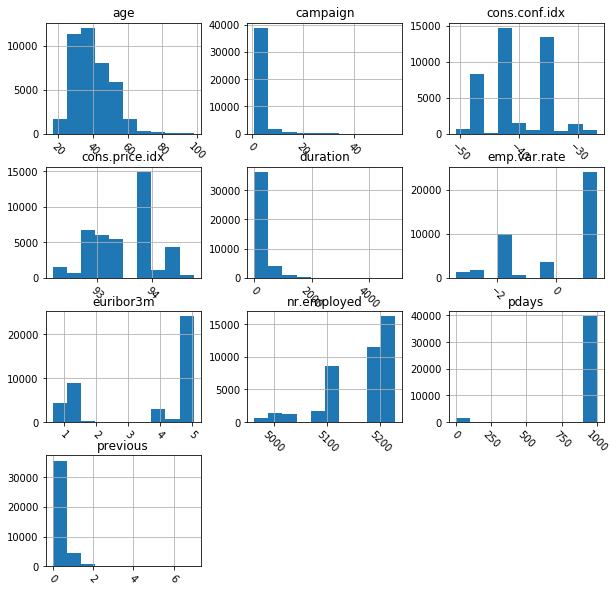

In [0]:
#Task 2 - continuous
#Histogram grid
df.hist(figsize=(10,10), xrot=-45)
plt.show()

In [0]:
#Task 2 - categorical
cat = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for i in cat:
  print(df[i].value_counts()/df[i].count())
  print("\n")

admin.           0.253041
blue-collar      0.224680
technician       0.163708
services         0.096350
management       0.071000
retired          0.041741
entrepreneur     0.035354
self-employed    0.034505
housemaid        0.025739
unemployed       0.024622
student          0.021247
unknown          0.008013
Name: job, dtype: float64


married     0.605225
single      0.280844
divorced    0.111988
unknown     0.001943
Name: marital, dtype: float64


university.degree      0.295437
high.school            0.231018
basic.9y               0.146784
professional.course    0.127286
basic.4y               0.101401
basic.6y               0.055630
unknown                0.042008
illiterate             0.000437
Name: education, dtype: float64


no         0.791176
unknown    0.208751
yes        0.000073
Name: default, dtype: float64


yes        0.523857
no         0.452104
unknown    0.024039
Name: housing, dtype: float64


no         0.824248
yes        0.151713
unknown    0.024039
Name: loan

In [0]:
#Task 3 - categorical correlations
contingency_table = pd.crosstab(index=df_cleaned['education'], columns=df_cleaned['housing'], margins=True)
chi2, p, dof, ex =stats.chi2_contingency(contingency_table)
print("education and housing")
print(chi2, p, dof)

In [0]:
#Task 3 - continuous correlations
#correlation matrix
cont = df[['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]
corr = df2.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1,-0.000865705,0.00459358,-0.034369,0.0243647,-0.000370685,0.000856715,0.129372,0.0107674,-0.0177251
duration,-0.000865705,1,-0.0716992,-0.047577,0.0206404,-0.0279679,0.00531227,-0.00817287,-0.0328967,-0.0447032
campaign,0.00459358,-0.0716992,1,0.0525836,-0.0791415,0.150754,0.127836,-0.0137331,0.135133,0.144095
pdays,-0.034369,-0.047577,0.0525836,1,-0.587514,0.271004,0.0788891,-0.0913424,0.296899,0.372605
previous,0.0243647,0.0206404,-0.0791415,-0.587514,1,-0.420489,-0.20313,-0.0509364,-0.454494,-0.501333
emp.var.rate,-0.000370685,-0.0279679,0.150754,0.271004,-0.420489,1,0.775334,0.196041,0.972245,0.90697
cons.price.idx,0.000856715,0.00531227,0.127836,0.0788891,-0.20313,0.775334,1,0.0589862,0.68823,0.522034
cons.conf.idx,0.129372,-0.00817287,-0.0137331,-0.0913424,-0.0509364,0.196041,0.0589862,1,0.277686,0.100513
euribor3m,0.0107674,-0.0328967,0.135133,0.296899,-0.454494,0.972245,0.68823,0.277686,1,0.945154
nr.employed,-0.0177251,-0.0447032,0.144095,0.372605,-0.501333,0.90697,0.522034,0.100513,0.945154,1


# Feature Engineering



1.   Dropping non useful information
2.   Do any variables need to combine certain levels
3.   Modifying variables, encoding and scaling




In [0]:
#Task 1 - remove missing values

#Dropping the unknown job level
df_cleaned = df[df.job != 'unknown']
#Dropping the unknown marital status
df_cleaned = df_cleaned[df_cleaned.marital != 'unknown']
#Dropping the unknown and illiterate education level
df_cleaned = df_cleaned[df_cleaned.education != 'unknown']
#Dropping the unknown housing loan status
df_cleaned = df_cleaned[df_cleaned.housing != 'unknown']
#Dropping the unknown personal loan status
df_cleaned = df_cleaned[df_cleaned.loan != 'unknown']

#Deleting the 'default' column because there were very few affirmative values, most were 'no' or unkown
del df_cleaned['default']
#Deleting the 'duration' column because it is highly correlated with the output target (e.g., if duration=0 then y=”no”) yet, the duration is not known before a call is performed.
del df_cleaned['duration']

In [0]:
#Task 2 - leaving for a later date...

In [0]:
#Task 3 - variable encoding and scaling
"""
- See if there are any highly correlated features that can be dropped
- See if there are any features that can be combined
- Conduct one-hot or frequency encoding of categorical variables taking into account cardinality
  if you use one hot encoding on data with high cardinality it will likely become very sparse causing multiple problems for your models.
  Two approcahes: the first is to try and discard less frequent values or even combine some until you have say 5 levels for each.
  The second approach is an automated approach usine sklearn's one hot encoder with n_values() set to 5.
"""


# Cross-Validation and parameter optimisation

1.   Choose data set split
2.   Choose models
3.   Choose parameters
4.   grid search vs random search




## Results

1.   Scores
2.   Analysis

